In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [12]:
path = "D:/JK/Hari/1/Dataset 1/car_prices.csv"
df = pd.read_csv(path)

In [4]:
df.head()

year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors america  inc  20800.0       21500.0   
2  financial services remarketing (lease)  31900.0       30000.0   
3                 volvo na rep/world omni  27500.0       27750.0   
4  financial services remarketing (lease)  66000.0       67000.0   

                                  saledate  
0  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
1  Tue Dec 16 2014 12:30:00 GMT-0800 (PST)  
2  Thu Jan 15 2015 04:30:00 GMT-0800 (PST)  
3  Thu Jan 29 2015 04:30:00 GMT-0800 (PST)  
4  Thu Dec 18 2014 12:30:00 GMT-0800 (PST)

In [5]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
# 'conditions' column is dropped as it has missing entries
df = df.drop('condition', axis=1)

df_copy = df.copy()
# date is converted to numerical values
df_copy['saledate'] = pd.to_datetime(df['saledate'])

# Columns to standardize
columns_to_standardize = ['year', 'odometer', 'mmr', 'sellingprice', 'saledate']
df_copy[columns_to_standardize] = scaler.fit_transform(df_copy[columns_to_standardize])

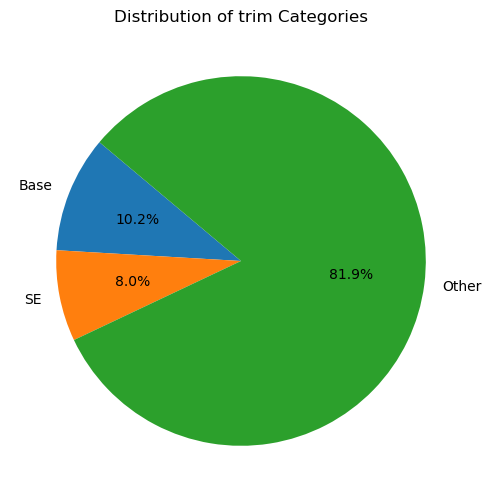

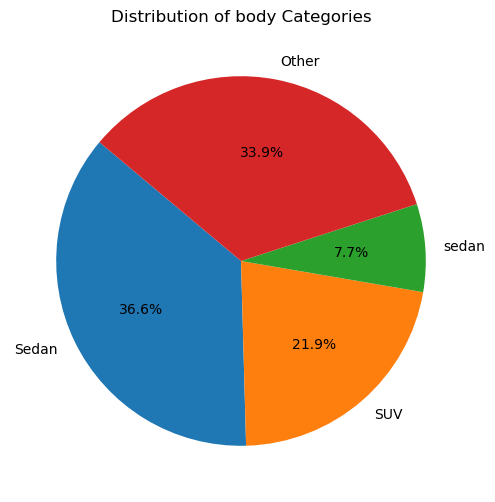

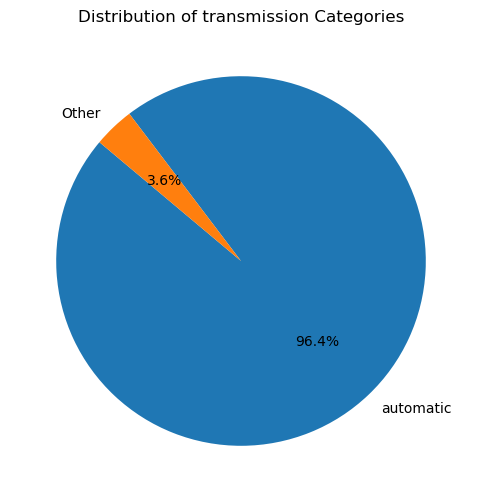

In [15]:
# Select the columns to plot
columns_to_plot = ['make', 'trim', 'body', 'transmission']

# Plot pie charts for each selected column based on the counts of each category
for column in columns_to_plot:
    counts = df[column].value_counts()
    total = counts.sum()
    percentages = counts / total * 100
    
    # Identify categories with less than 5% and group them as "Other"
    small_categories = percentages[percentages < 5].index
    counts['Other'] = counts[small_categories].sum()
    counts = counts.drop(small_categories)
    
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {column} Categories')
    plt.show()

## Observations
1) The make of the car is evenly distributed amoung users, with Ford and Chevorlet doing slightly better.
2) Sedan in the most popular chategory amoung car body type. SUV is the second popular
3) Automatic Transmission is the most popular transmission type by a large margin.

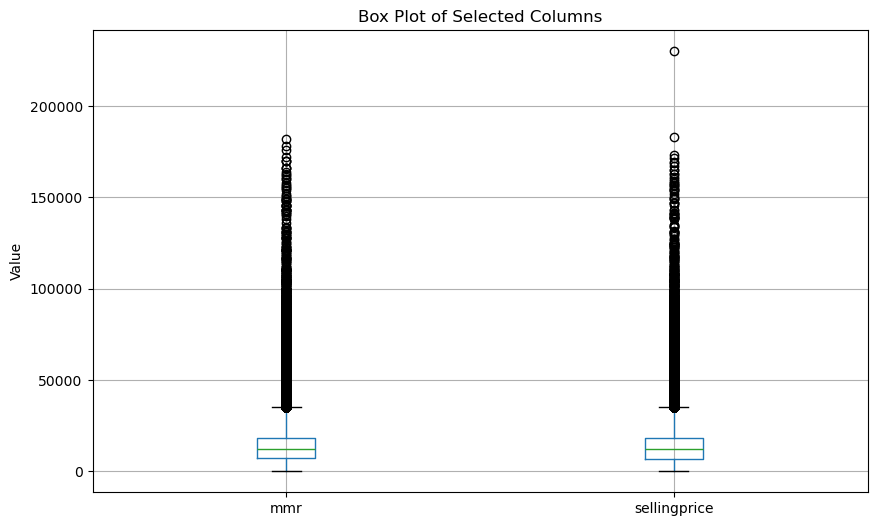

In [21]:
# Select the columns to plot
columns_to_plot = ['mmr','sellingprice']
# Plot box plots for the selected columns
plt.figure(figsize=(10, 6))
df_copy[columns_to_plot].boxplot()
plt.title('Box Plot of Selected Columns')
plt.ylabel('Value')
plt.show()
